In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

df = pd.read_csv("hotel_bookings.csv")

features = [
    "lead_time", "stays_in_weekend_nights", "stays_in_week_nights",
    "adults", "children", "babies", "adr", "is_repeated_guest",
    "total_of_special_requests"
]
df_segment = df[features]

df_segment.dropna(subset=['adults'], inplace=True)
df_segment.isnull().sum()

C:\Users\S.YASHWANTH KRISHNA\AppData\Local\Temp\ipykernel_24912\1132542405.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_segment.dropna(subset=['adults'], inplace=True)


lead_time                    0
stays_in_weekend_nights      0
stays_in_week_nights         0
adults                       0
children                     0
babies                       0
adr                          0
is_repeated_guest            0
total_of_special_requests    0
dtype: int64

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_segment)

inertias = []
k_range = range(2, 11)
for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_scaled)
    inertias.append(model.inertia_)

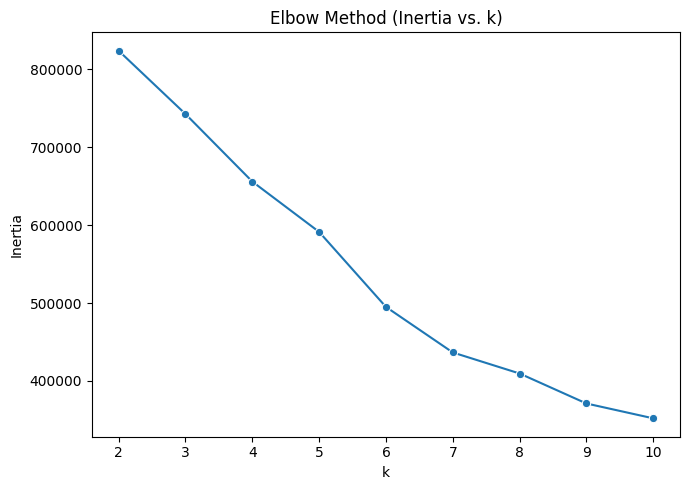


Cluster Summary (average values):
               lead_time  stays_in_weekend_nights  stays_in_week_nights  \
guest_segment                                                             
0                 114.66                     0.75                  2.04   
1                  90.85                     1.07                  2.74   
2                 144.83                     2.34                  5.73   
3                  83.22                     1.24                  3.13   
4                  78.65                     0.60                  1.82   

               adults  children  babies     adr  is_repeated_guest  \
guest_segment                                                        
0                2.07      0.00    0.00  102.98               0.00   
1                1.97      1.48    0.00  164.48               0.00   
2                1.98      0.02    0.00  100.72               0.00   
3                1.99      0.20    1.04  121.14               0.00   
4                1.

C:\Users\S.YASHWANTH KRISHNA\AppData\Local\Temp\ipykernel_24912\1364885153.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_segment["guest_segment"] = kmeans.fit_predict(X_scaled)


In [35]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.lineplot(x=list(k_range), y=inertias, marker="o", ax=ax)
ax.set_title("Elbow Method (Inertia vs. k)")
ax.set_xlabel("k")
ax.set_ylabel("Inertia")
plt.tight_layout()
plt.show()

optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_segment["guest_segment"] = kmeans.fit_predict(X_scaled)

df = df.loc[df_segment.index]
df["guest_segment"] = df_segment["guest_segment"]

cluster_summary = df.groupby("guest_segment")[features].mean().round(2)
print("\nCluster Summary (average values):")
print(cluster_summary)


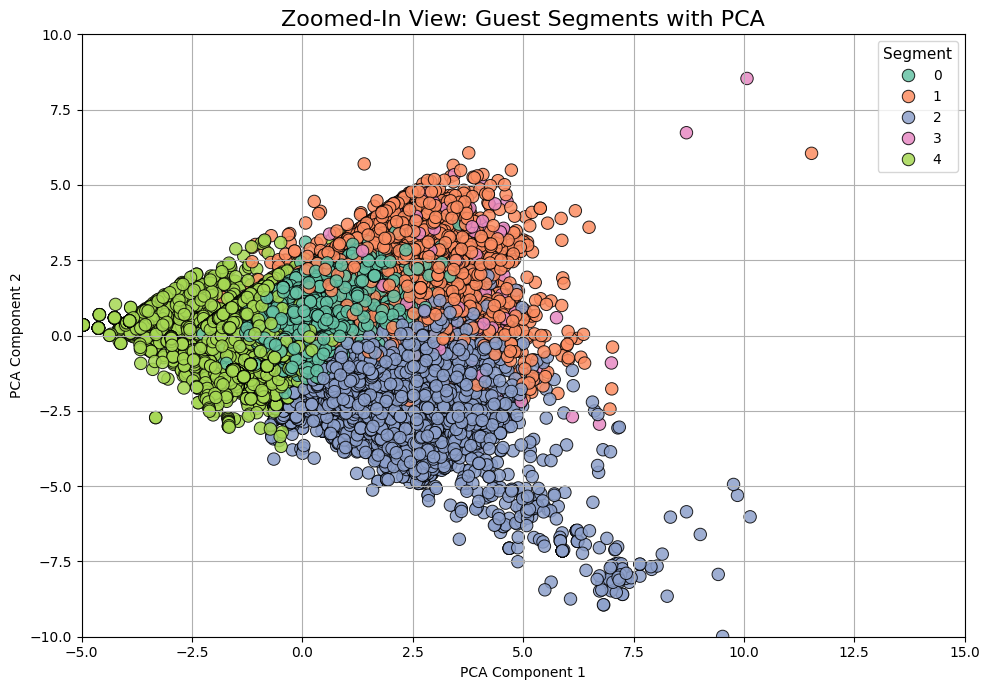

In [36]:
# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=df_segment["guest_segment"],
    palette="Set2", s=80, alpha=0.85, edgecolor="black"
)
plt.title("Zoomed-In View: Guest Segments with PCA", fontsize=16)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.xlim(-5, 15)
plt.ylim(-10, 10)
plt.legend(title="Segment", fontsize=10, title_fontsize=11)
plt.grid(True)
plt.tight_layout()
plt.show()

